In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2024
MAX_YEAR = 2124
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.09537  | 0.6289    | 4.027     | 4.384     |
| 8         | -0.07471  | 0.6914    | 4.121     | 0.9148    |
| 45        | -0.02542  | 0.3867    | 5.066     | 0.6083    |
| 62        | -0.01966  | 0.443     | 4.632     | 0.4228    |
| 71        | -0.01891  | 0.6562    | 4.556     | 0.4456    |
| 91        | -0.01711  | 0.5109    | 4.073     | 0.3675    |
Curve params found
{'push': 0.5108919079114652,
 'shift': 4.072692672312848,
 'slope': 0.3675338954991767}
-
## Chance of nonscaling delay ##


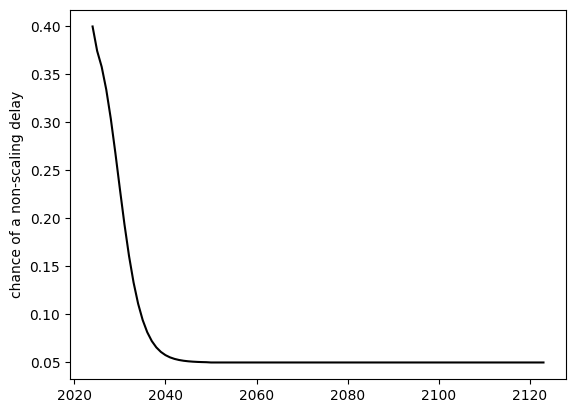

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2034

In [2]:
nonscaling_points = [(2024, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.1315   | 0.6065    | 5.366     | 9.553     |
| 17        | -0.1076   | 2.717     | 5.351     | 0.2742    |
| 50        | -0.1016   | 0.01      | 7.916     | 4.175     |
| 58        | -0.08684  | 0.01      | 10.0      | 2.04      |
| 59        | -0.04844  | 1.01      | 9.976     | 0.9159    |
| 75        | -0.03944  | 1.273     | 9.565     | 0.6126    |
Curve params found
{'push': 1.2730421190780605,
 'shift': 9.565238788422956,
 'slope': 0.6125513472657313}
-
## Chance of nonscaling delay ##


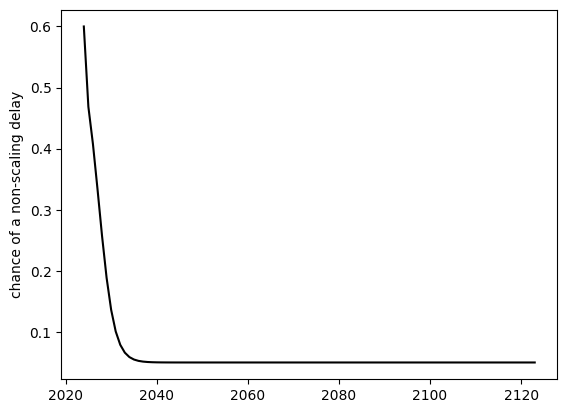

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2034 -

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.6),
                     (2026, 0.4),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.2741   | 6.975     | 2.76      | 5.993     |
| 5         | -0.208    | 0.9443    | 1.453     | 4.051     |
| 8         | -0.1235   | 2.116     | 8.783     | 0.3325    |
| 41        | -0.02562  | 0.07845   | 9.286     | 1.116     |
Curve params found
{'push': 0.0784462822720058,
 'shift': 9.286186652340962,
 'slope': 1.1163293090580109}
-
## Chance of nonscaling delay ##


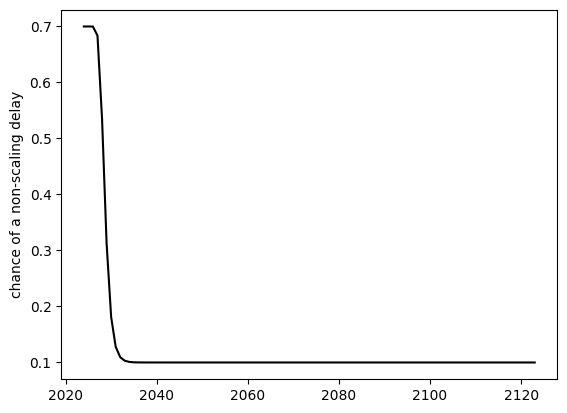

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 54%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.06416  | 0.294     | 0.5473    | 7.427     |
| 24        | -0.05104  | 0.5584    | 8.859     | 3.737     |
| 25        | -0.05     | 0.1021    | 5.572     | 7.365     |
| 42        | -0.05     | 0.01      | 9.777     | 5.919     |
| 43        | -0.05     | 0.01      | 7.661     | 5.104     |
| 50        | -0.05     | 0.01      | 4.408     | 3.949     |
| 52        | -0.05     | 0.01      | 6.732     | 3.35      |
| 59        | -0.04864  | 0.03031   | 3.817     | 1.442     |
Curve params found
{'push': 0.03030881565040179,
 'shift': 3.8169446690942412,
 'slope': 1.4420801102900607}
-
## Chance of nonscaling delay ##


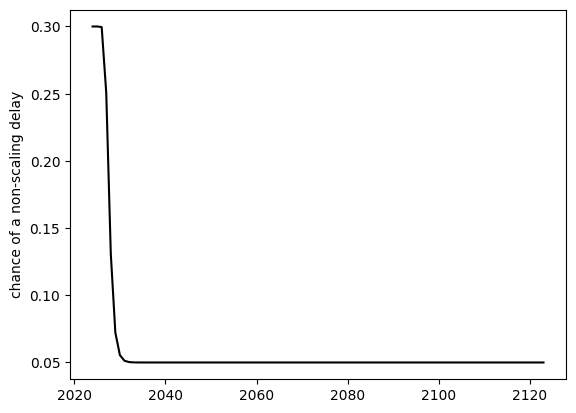

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - ch

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.09433  | 6.434     | 8.118     | 5.945     |
| 4         | -0.09031  | 3.051     | 2.812     | 4.029     |
| 6         | -0.08903  | 2.222     | 1.848     | 7.572     |
| 10        | -0.05295  | 0.6324    | 5.896     | 3.101     |
| 29        | -0.04947  | 0.0559    | 4.684     | 1.533     |
| 41        | -0.0179   | 0.01      | 7.201     | 1.151     |
| 68        | -0.01506  | 0.599     | 6.468     | 0.3285    |
| 78        | -0.01239  | 0.1661    | 5.744     | 0.5919    |
Curve params found
{'push': 0.16607464318917023,
 'shift': 5.744447197069915,
 'slope': 0.5918802252428286}
-
## Chance of nonscaling delay ##


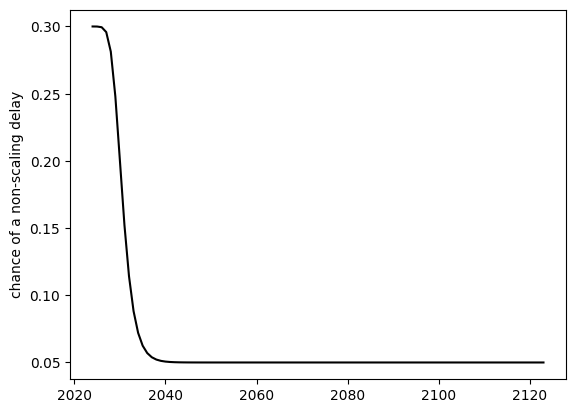

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2034 

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.03056  | 8.83      | 8.924     | 4.15      |
| 3         | -0.01414  | 0.9357    | 4.713     | 9.087     |
| 7         | -0.01003  | 0.2963    | 6.218     | 2.964     |
| 13        | -0.01     | 0.1466    | 9.023     | 6.099     |
| 42        | -0.01     | 0.01      | 7.671     | 4.163     |
| 54        | -0.009997 | 0.01      | 8.471     | 2.655     |
| 77        | -0.009984 | 0.01      | 10.0      | 2.391     |
| 104       | -0.00994  | 0.01      | 9.214     | 2.155     |
Curve params found
{'push': 0.01, 'shift': 9.214181914681317, 'slope': 2.154910007854612}
-
## Chance of nonscaling delay ##


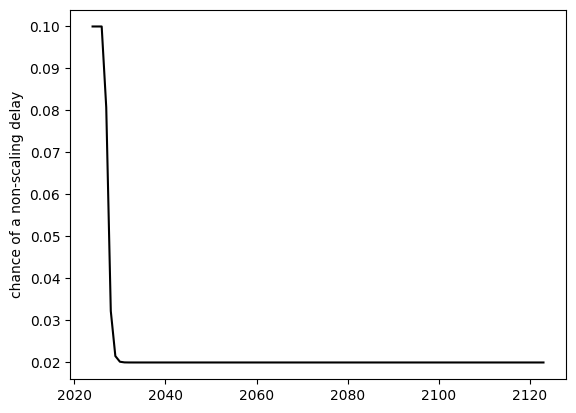

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - chan

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1492   | 1.652     | 6.556     | 5.964     |
| 9         | -0.1123   | 0.1845    | 2.182     | 1.34      |
| 16        | -0.1036   | 0.1128    | 6.108     | 1.099     |
| 32        | -0.07904  | 2.453     | 8.157     | 0.05585   |
| 60        | -0.07711  | 2.168     | 8.029     | 0.1201    |
| 63        | -0.06837  | 0.1723    | 6.001     | 0.724     |
| 74        | -0.05933  | 0.2257    | 5.784     | 0.4453    |
| 79        | -0.05078  | 0.6364    | 5.861     | 0.3684    |
| 83        | -0.05031  | 0.8517    | 6.273     | 0.2705    |
Curve params found
{'push': 0.851650539800193,
 'shift': 6.272603382317472,
 'slope': 0.2704712699077674}
-
## Chance of nonscaling delay ##


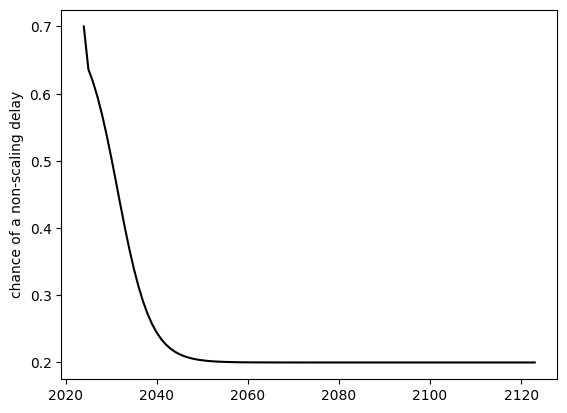

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 64%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 54%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2034

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-01-20 12:53:11.991869
